# [**Ajustement pour le hasard dans l'évaluation des performances de clustering**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_3_cluster/plot_adjusted_for_chance_measures.ipynb)<br/>([*Adjustment for chance in clustering performance evaluation*](https://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html))

Les graphiques suivants illustrent l'impact du nombre de clusters et du nombre d'échantillons sur diverses métriques d'évaluation des performances de clustering.

Les mesures non ajustées telles que la V-Measure montrent une dépendance entre le nombre de clusters et le nombre d'échantillons : la V-Measure moyenne de l'étiquetage aléatoire augmente de manière significative à mesure que le nombre de clusters est plus proche du nombre total d'échantillons utilisés pour calculer la mesure.

Ajusté pour la mesure du hasard telle que l'ARI affiche certaines variations aléatoires centrées autour d'un score moyen de 0,0 pour n'importe quel nombre d'échantillons et de grappes.

Seules les mesures ajustées peuvent donc être utilisées en toute sécurité comme indice de consensus pour évaluer la stabilité moyenne des algorithmes de clustering pour une valeur donnée de k sur divers sous-échantillons se chevauchant de l'ensemble de données.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_adjusted_for_chance_measures_001.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_adjusted_for_chance_measures_002.png)


Computing adjusted_rand_score for 10 values of n_clusters and n_samples=100
done in 0.031s
Computing v_measure_score for 10 values of n_clusters and n_samples=100
done in 0.043s
Computing ami_score for 10 values of n_clusters and n_samples=100
done in 0.309s
Computing mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.035s
Computing adjusted_rand_score for 10 values of n_clusters and n_samples=1000
done in 0.036s
Computing v_measure_score for 10 values of n_clusters and n_samples=1000
done in 0.055s
Computing ami_score for 10 values of n_clusters and n_samples=1000
done in 0.276s
Computing mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.083s


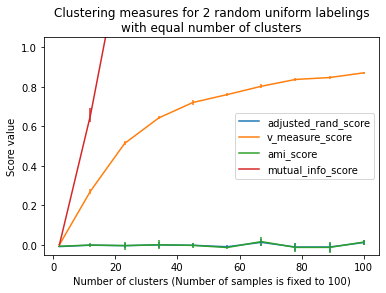

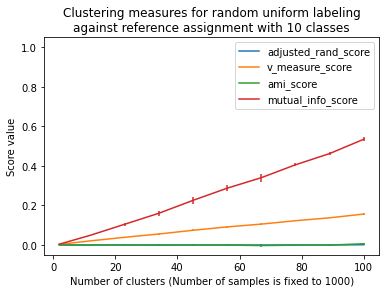

In [1]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics


def uniform_labelings_scores(
    score_func, n_samples, n_clusters_range, fixed_n_classes=None, n_runs=5, seed=42
):
    """Compute score for 2 random uniform cluster labelings.

    Both random labelings have the same number of clusters for each value
    possible value in ``n_clusters_range``.

    When fixed_n_classes is not None the first labeling is considered a ground
    truth class assignment with fixed number of classes.
    """
    random_labels = np.random.RandomState(seed).randint
    scores = np.zeros((len(n_clusters_range), n_runs))

    if fixed_n_classes is not None:
        labels_a = random_labels(low=0, high=fixed_n_classes, size=n_samples)

    for i, k in enumerate(n_clusters_range):
        for j in range(n_runs):
            if fixed_n_classes is None:
                labels_a = random_labels(low=0, high=k, size=n_samples)
            labels_b = random_labels(low=0, high=k, size=n_samples)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores


def ami_score(U, V):
    return metrics.adjusted_mutual_info_score(U, V)


score_funcs = [
    metrics.adjusted_rand_score,
    metrics.v_measure_score,
    ami_score,
    metrics.mutual_info_score,
]

# 2 independent random clusterings with equal cluster number

n_samples = 100
n_clusters_range = np.linspace(2, n_samples, 10).astype(int)

plt.figure(1)

plots = []
names = []
for score_func in score_funcs:
    print(
        "Computing %s for %d values of n_clusters and n_samples=%d"
        % (score_func.__name__, len(n_clusters_range), n_samples)
    )

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    print("done in %0.3fs" % (time() - t0))
    plots.append(
        plt.errorbar(n_clusters_range, np.median(scores, axis=1), scores.std(axis=1))[0]
    )
    names.append(score_func.__name__)

plt.title(
    "Clustering measures for 2 random uniform labelings\nwith equal number of clusters"
)
plt.xlabel("Number of clusters (Number of samples is fixed to %d)" % n_samples)
plt.ylabel("Score value")
plt.legend(plots, names)
plt.ylim(bottom=-0.05, top=1.05)


# Random labeling with varying n_clusters against ground class labels
# with fixed number of clusters

n_samples = 1000
n_clusters_range = np.linspace(2, 100, 10).astype(int)
n_classes = 10

plt.figure(2)

plots = []
names = []
for score_func in score_funcs:
    print(
        "Computing %s for %d values of n_clusters and n_samples=%d"
        % (score_func.__name__, len(n_clusters_range), n_samples)
    )

    t0 = time()
    scores = uniform_labelings_scores(
        score_func, n_samples, n_clusters_range, fixed_n_classes=n_classes
    )
    print("done in %0.3fs" % (time() - t0))
    plots.append(
        plt.errorbar(n_clusters_range, scores.mean(axis=1), scores.std(axis=1))[0]
    )
    names.append(score_func.__name__)

plt.title(
    "Clustering measures for random uniform labeling\n"
    "against reference assignment with %d classes" % n_classes
)
plt.xlabel("Number of clusters (Number of samples is fixed to %d)" % n_samples)
plt.ylabel("Score value")
plt.ylim(bottom=-0.05, top=1.05)
plt.legend(plots, names)
plt.show()